<a href="https://colab.research.google.com/github/mathengem/Algorithmic-Trading-Backtesting-in-python/blob/main/5_days_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib pandas-datareader yfinance statsmodels

[*********************100%%**********************]  1 of 1 completed


3/3 [==============================] - 0s 4ms/step
LSTM Test RMSE:  3.3317526499804533


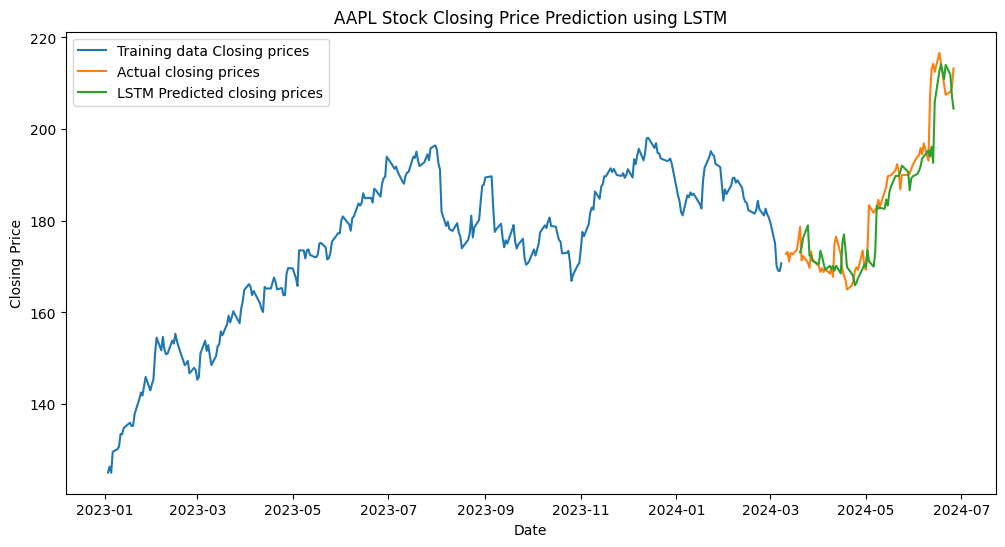

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Set up Yahoo Finance data source
yf.pdr_override()
# Retrieve historical stock data
symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2024-06-27"
stock_data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
# Extract closing prices
closing_prices = stock_data["Close"]
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.values.reshape(-1, 1))
# Divide data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:, :]
test_data_index = closing_prices[train_size:].index
# Function to generate time series dataset for LSTM
def create_dataset(dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size - 1):
        data_x.append(dataset[i:(i + window_size), 0])
        data_y.append(dataset[i + window_size, 0])
    return np.array(data_x), np.array(data_y)
# Generate time series dataset for LSTM
window_size = 5
train_x, train_y = create_dataset(train_data, window_size)
test_x, test_y = create_dataset(test_data, window_size)
# Reshape input to [samples, time steps, features]
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
# Construct LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train LSTM model
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=0)
# Make predictions with LSTM model
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)
# Revert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])
# Compute root mean squared error (RMSE) for LSTM
test_rmse = sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
print("LSTM Test RMSE: ", test_rmse)
# Display actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices[:-len(test_data_index)], label="Training data Closing prices")
plt.plot(closing_prices[-len(test_data_index):], label="Actual closing prices")
plt.plot(test_data_index[7:], test_predict[:-1], label="LSTM Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{symbol} Stock Closing Price Prediction using LSTM")
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


3/3 [==============================] - 0s 5ms/step
LSTM Test RMSE:  3.366397942504793


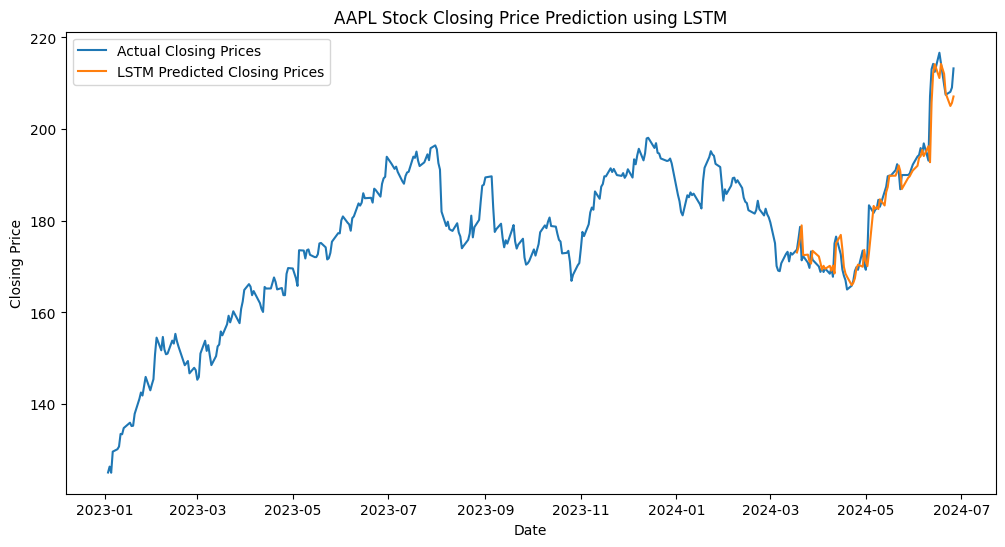

Predicted Closing Prices:
[[173.08595]
 [174.27084]
 [176.29759]
 [178.99998]
 [172.4997 ]
 [172.61002]
 [171.12909]
 [170.64978]
 [173.44398]
 [172.21512]
 [170.8555 ]
 [169.30795]
 [170.17204]
 [169.50917]
 [170.17012]
 [169.0952 ]
 [170.20375]
 [168.49771]
 [175.05737]
 [176.91653]
 [173.84741]
 [169.93358]
 [168.48764]
 [167.78386]
 [165.94849]
 [166.45569]
 [167.44102]
 [169.57039]
 [170.42764]
 [169.97527]
 [173.6436 ]
 [171.13354]
 [170.0956 ]
 [172.97264]
 [183.23352]
 [182.62926]
 [182.97614]
 [182.5553 ]
 [184.69043]
 [183.34062]
 [186.22519]
 [187.37802]
 [189.82643]
 [189.81647]
 [189.83688]
 [190.73944]
 [192.07425]
 [190.83707]
 [186.91489]
 [189.34975]
 [189.69623]
 [190.36522]
 [190.9746 ]
 [191.995  ]
 [193.71577]
 [194.07098]
 [195.45769]
 [194.1156 ]
 [196.26607]
 [192.7721 ]
 [205.83566]
 [212.20668]
 [214.1747 ]
 [211.14986]
 [214.2318 ]
 [212.0661 ]
 [207.80931]
 [205.05127]
 [205.71045]
 [207.11961]]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Set up Yahoo Finance data source
yf.pdr_override()

# Retrieve historical stock data
symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2024-06-27"
stock_data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

# Extract closing prices
closing_prices = stock_data["Close"]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.values.reshape(-1, 1))

# Divide data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:, :]
test_data_index = closing_prices[train_size:].index

# Function to generate time series dataset for LSTM
def create_dataset(dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size):
        data_x.append(dataset[i:(i + window_size), 0])
        data_y.append(dataset[i + window_size, 0])
    return np.array(data_x), np.array(data_y)

# Generate time series dataset for LSTM
window_size = 5
train_x, train_y = create_dataset(train_data, window_size)
test_x, test_y = create_dataset(test_data, window_size)

# Reshape input to [samples, time steps, features]
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

# Construct LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train LSTM model
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=0)

# Make predictions with LSTM model
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

# Revert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform(train_y.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform(test_y.reshape(-1, 1))

# Compute root mean squared error (RMSE) for LSTM
test_rmse = sqrt(mean_squared_error(test_y, test_predict))
print("LSTM Test RMSE: ", test_rmse)

# Display actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices.index, closing_prices, label="Actual Closing Prices")
plt.plot(test_data_index[window_size:], test_predict, label="LSTM Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{symbol} Stock Closing Price Prediction using LSTM")
plt.legend()
plt.show()

# Print the predicted closing prices
print("Predicted Closing Prices:")
print(test_predict)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 21ms/step


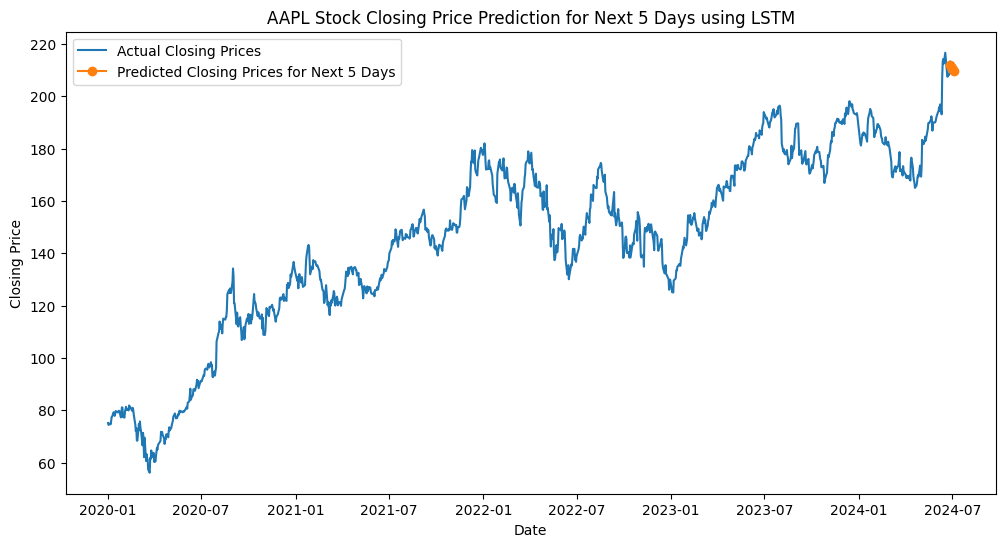

Predicted Closing Prices for the Next 5 Days:
[[212.01273]
 [211.3646 ]
 [210.76328]
 [210.1926 ]
 [209.66833]]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Set up Yahoo Finance data source
yf.pdr_override()

# Retrieve historical stock data
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2024-06-27"
stock_data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

# Extract closing prices
closing_prices = stock_data["Close"]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.values.reshape(-1, 1))

# Function to generate time series dataset for LSTM
def create_dataset(dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size):
        data_x.append(dataset[i:(i + window_size), 0])
        data_y.append(dataset[i + window_size, 0])
    return np.array(data_x), np.array(data_y)

# Generate time series dataset for LSTM
window_size = 5
data_x, data_y = create_dataset(scaled_data, window_size)

# Reshape input to [samples, time steps, features]
data_x = np.reshape(data_x, (data_x.shape[0], 1, data_x.shape[1]))

# Construct LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train LSTM model
model.fit(data_x, data_y, epochs=100, batch_size=1, verbose=0)

# Make predictions for the next 3 to 5 days
last_window = scaled_data[-window_size:]  # Last window_size data points
predicted_prices = []

for _ in range(5):
    # Prepare the input data
    input_data = np.reshape(last_window, (1, 1, window_size))
    # Predict the next price
    predicted_price = model.predict(input_data)
    # Append the predicted price to the list
    predicted_prices.append(predicted_price[0, 0])
    # Update the last_window with the new predicted price
    last_window = np.append(last_window[1:], predicted_price, axis=0)

# Revert predictions to original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Display actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices.index, closing_prices, label="Actual Closing Prices")
future_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')
plt.plot(future_dates, predicted_prices, label="Predicted Closing Prices for Next 5 Days", marker='o')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{symbol} Stock Closing Price Prediction for Next 5 Days using LSTM")
plt.legend()
plt.show()

# Print the predicted closing prices for the next 3 to 5 days
print("Predicted Closing Prices for the Next 5 Days:")
print(predicted_prices)


[*********************100%%**********************]  1 of 1 completed


Current Closing Price: 213.25
1/1 [==============================] - 0s 20ms/step


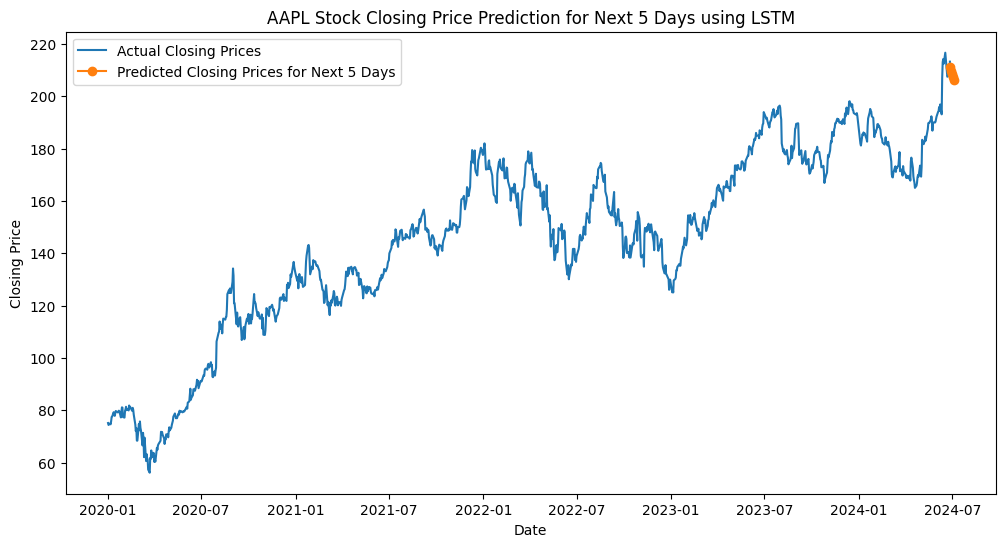

Predicted Closing Prices for the Next 5 Days:
[[211.16177]
 [209.86179]
 [208.619  ]
 [207.4395 ]
 [206.39745]]


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Set up Yahoo Finance data source
yf.pdr_override()

# Retrieve historical stock data
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2024-06-27"
stock_data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

# Extract closing prices
closing_prices = stock_data["Close"]

# Print the current closing price
current_price = closing_prices[-1]
print("Current Closing Price:", current_price)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.values.reshape(-1, 1))

# Function to generate time series dataset for LSTM
def create_dataset(dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size):
        data_x.append(dataset[i:(i + window_size), 0])
        data_y.append(dataset[i + window_size, 0])
    return np.array(data_x), np.array(data_y)

# Generate time series dataset for LSTM
window_size = 5
data_x, data_y = create_dataset(scaled_data, window_size)

# Reshape input to [samples, time steps, features]
data_x = np.reshape(data_x, (data_x.shape[0], 1, data_x.shape[1]))

# Construct LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train LSTM model
model.fit(data_x, data_y, epochs=100, batch_size=1, verbose=0)

# Make predictions for the next 3 to 5 days
last_window = scaled_data[-window_size:]  # Last window_size data points
predicted_prices = []

for _ in range(5):
    # Prepare the input data
    input_data = np.reshape(last_window, (1, 1, window_size))
    # Predict the next price
    predicted_price = model.predict(input_data)
    # Append the predicted price to the list
    predicted_prices.append(predicted_price[0, 0])
    # Update the last_window with the new predicted price
    last_window = np.append(last_window[1:], predicted_price, axis=0)

# Revert predictions to original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Display actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices.index, closing_prices, label="Actual Closing Prices")
future_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')
plt.plot(future_dates, predicted_prices, label="Predicted Closing Prices for Next 5 Days", marker='o')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{symbol} Stock Closing Price Prediction for Next 5 Days using LSTM")
plt.legend()
plt.show()

# Print the predicted closing prices for the next 3 to 5 days
print("Predicted Closing Prices for the Next 5 Days:")
print(predicted_prices)
